# Examples: reachability set in 3D
Andrey Tremba  
18.01.2022

A couple examples of 3-dimensional systems.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc # matrix exponent verification
# import math
# for interactive image rotation
%matplotlib notebook

# import sys
# import time # benchmarking
# import matplotlib
# print(f'python {sys.version},\n  matplotlib {matplotlib.__version__},\n'
#       f'  numpy {np.__version__},\n  scipy {sc.__version__}')

# utitilites in ipynb files
import ipynb_loader # loader
import image_utils # equal 3d axis
import quasi_uniform_3d as qu3d # sphere point sampling
# import polynomial_utils as PolyU # analysis and integration of polynomials
# import convex_utils # maximum radius, etc
import reachability_set_utils as reach_set

# %load_ext line_profiler 
# run `conda install line_profiler` first

importing Jupyter notebook from image_utils.ipynb
importing Jupyter notebook from quasi_uniform_3d.ipynb
importing Jupyter notebook from reachability_set_utils.ipynb


<IPython.core.display.Javascript object>


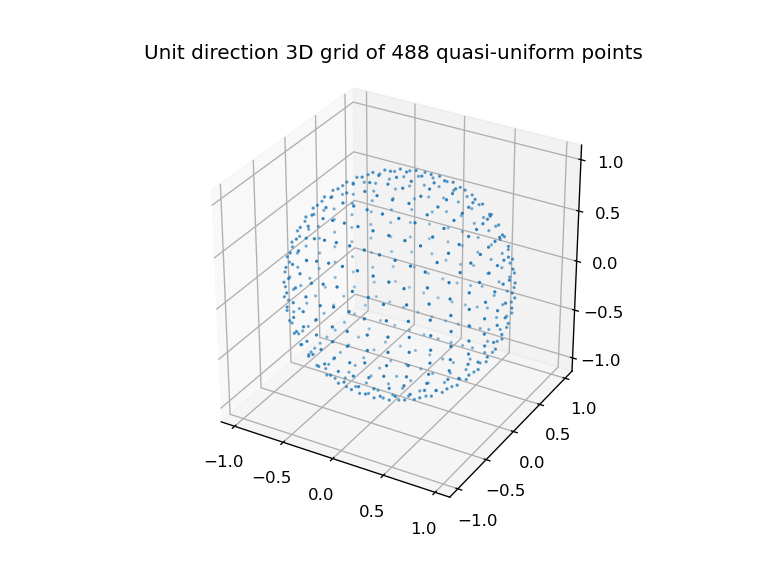

In [2]:
# Example directions for support function / element
N = 10 # N = 60

uniform_directions = qu3d.generate_sphere_uniform_grid(N) # quasi-uniform grid, cf. 

np.testing.assert_allclose(np.linalg.norm(uniform_directions, axis=1), 1)


fig_uniform = plt.figure()
ax_uniform = fig_uniform.add_subplot(projection='3d')
ax_uniform.set_title(f'Unit direction 3D grid of {len(uniform_directions)} quasi-uniform points')

ax_uniform.scatter(*uniform_directions.T, s=1, marker='o')
image_utils.set_axes3d_equal(ax_uniform)

## Example 1: Jordan block (three equal real eigenvalues)

$$\dot{x} = A x + B u$$

$$A = \begin{bmatrix} 
-\sigma & 1 & 0 \\
0 & -\sigma & 1 \\
0 & 0 & -\sigma 
\end{bmatrix}, \quad
e^{At} = e^{-\sigma t}\begin{bmatrix} 
1 & t & \frac{t^2}{2} \\
0 & 1 & t \\
0 & 0 & 1 
\end{bmatrix}$$

Case 1, 3D control, ball-bounded:

$$B = \begin{bmatrix} 1 & 0 & 0\\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}, 
\quad u \in U = \{u : \|u\|_2 \leq 1\}$$
$$s_U(q) = \|q\|_2, \quad a_U(q) = \frac{q}{\|q\|_2}, q \neq 0$$

Case 2, scalar control:

$$B = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}, \quad u \in U = \{u : |u| \leq 1\}$$
$$s_U(q) = |q|, \quad a_U(q) = \mathrm{sign}(q)$$

In [3]:
print('Try different decay rate and run time.')

T = 4
sigma = 0.8

A_1 = np.array([[-sigma, 1, 0], [0, -sigma, 1], [0, 0, -sigma]])
def expm3_num(t, sigma=1):
    """Matrix exponential exp(A t) of Jordan block with given eigenvalue -sigma"""
    return np.exp(-sigma * t) * np.array([[1, t, t**2 / 2], [0, 1, t], [0, 0, 1]])

exp_func_A_1 = lambda t : expm3_num(t, sigma)

np.testing.assert_allclose(sc.linalg.expm(A_1 * T), exp_func_A_1(T))

print(f'Problem setup: matrix exponential for sigma = {sigma} is ready.\nT = {T}')

Try different decay rate and run time.
Problem setup: matrix exponential for sigma = 0.8 is ready.
T = 4


2168 unit directions on sphere
Support set for 2D ball-bounded control.


<IPython.core.display.Javascript object>


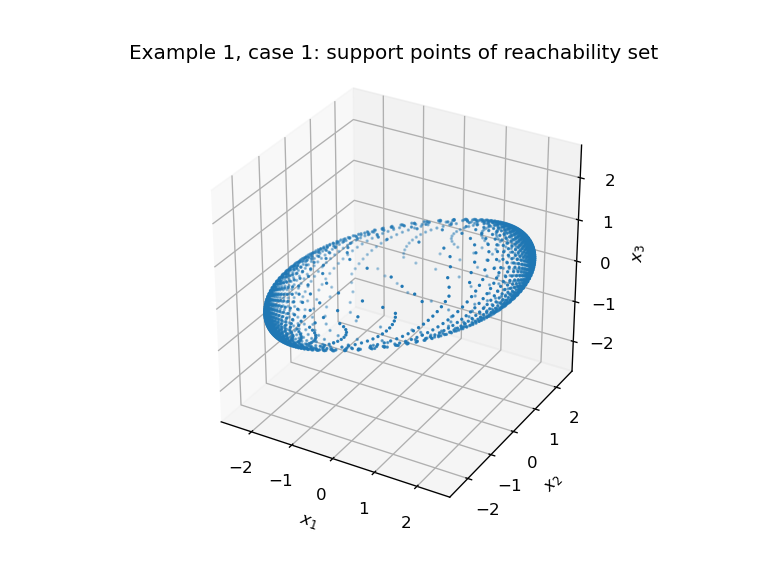

In [4]:
N = 20 # takes few minutes to calculate

uniform_directions = qu3d.generate_sphere_uniform_grid(N)

print(f'{len(uniform_directions)} unit directions on sphere')

sup_func_u_ball = lambda q : q / np.sqrt(sum(q**2))

print('Support set for 2D ball-bounded control.')

reachability_support_u_ball = lambda p, T : \
    reach_set.get_reachability_set_support(p, T, exp_func_A_1, sup_func_u_ball)

support_elements_u_ball = np.array([reachability_support_u_ball(p, T) for p in uniform_directions])

fig_uniform_support = plt.figure()
ax_uniform_support = fig_uniform_support.add_subplot(projection='3d')
ax_uniform_support.set_title('Example 1, case 1: support points of reachability set')
ax_uniform_support.set_xlabel('$x_1$')
ax_uniform_support.set_ylabel('$x_2$')
ax_uniform_support.set_zlabel('$x_3$')

[X, Y, Z] = support_elements_u_ball.T

ax_uniform_support.scatter(X, Y, Z, s=1)
image_utils.set_axes3d_equal(ax_uniform_support)

20888 unit directions on sphere
Support set for scalar control.


<IPython.core.display.Javascript object>


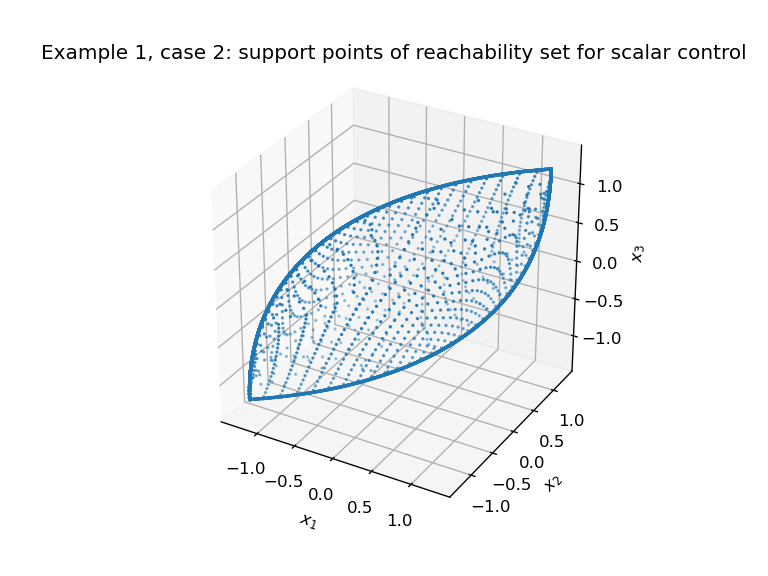

In [5]:
N = 60 # takes few minutes to calculate

uniform_directions = qu3d.generate_sphere_uniform_grid(N)

print(f'{len(uniform_directions)} unit directions on sphere')

print('Support set for scalar control.')

sup_func_u_segment = lambda q : np.sign(q)
B_segment = np.array([0, 0, 1])

reachability_support_u_segment = lambda p, T : \
    reach_set.get_reachability_set_support(p, T, exp_func_A_1, sup_func_u_segment, B_segment)

support_elements_u_segment = np.array([reachability_support_u_segment(p, T) for p in uniform_directions])

fig_uniform_support = plt.figure()
ax_uniform_support = fig_uniform_support.add_subplot(projection='3d')
ax_uniform_support.set_title('Example 1, case 2: support points of reachability set for scalar control')
ax_uniform_support.set_xlabel('$x_1$')
ax_uniform_support.set_ylabel('$x_2$')
ax_uniform_support.set_zlabel('$x_3$')

[X, Y, Z] = support_elements_u_segment.T

ax_uniform_support.scatter(X, Y, Z, s=1)
image_utils.set_axes3d_equal(ax_uniform_support)

A trajectory and optimal control


<IPython.core.display.Javascript object>


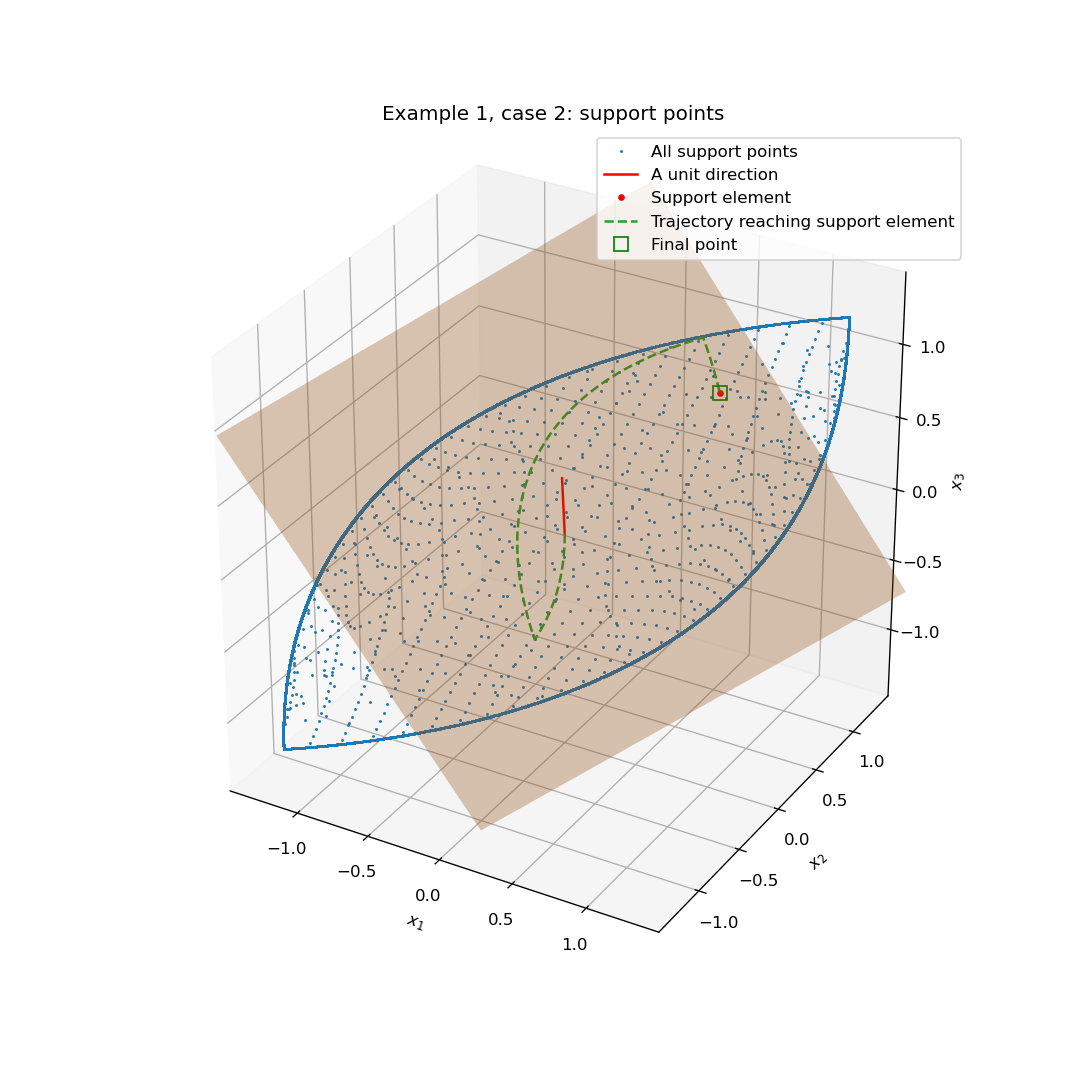

Numerical integration with optimal control
Residual between support element and final point, calculated numerically: 0.0004962763246990528


In [6]:
print('A trajectory and optimal control')

fig3d = plt.figure(figsize=(9, 9))
ax3d = fig3d.add_subplot(projection='3d')

ax3d.set_title('Example 1, case 2: support points')
ax3d.set_xlabel('$x_1$')
ax3d.set_ylabel('$x_2$')
ax3d.set_zlabel('$x_3$')
ax3d.grid()

ax3d.plot3D(*support_elements_u_segment.T, '.', markersize=1.5, label='All support points');

image_utils.set_axes3d_equal(ax3d)

# Get a support point for some direction
# rng(1)
# p = np.random.randn(3)
p = np.array([-0.3, 0.5, -0.1])
p = p / np.linalg.norm(p)
ax3d.plot3D([0, p[0]], [0, p[1]], [0, p[2]], 'r', label='A unit direction')

sup_element = reachability_support_u_segment(p, T)
ax3d.plot3D(*sup_element, 'or', markersize=3, label='Support element')

sup_value = p @ sup_element
square_XYZ = image_utils.get_rotated_square(p * sup_value, square_size=2.2)

ax3d.plot_surface(*square_XYZ, alpha=0.3) # label='Orthogonal plane' - not suited for a legend in 3d

u_opt_func = lambda t : reach_set.instant_universal_control_s(T - t, p, exp_func_A_1, sup_func_u_segment, B_segment)

t_range = np.linspace(0, T, 1000)

print('Numerical integration with optimal control')

rhs_with_explicit_control = lambda y, u : A_1 @ y + B_segment * u

fun_optimal = lambda t, y : rhs_with_explicit_control(y, u_opt_func(t))
# RK45 gives error in support element ~0.06, BDF ~ 0.005, LSODA ~ 5e-4, Radau ~ 0.002
sol = sc.integrate.solve_ivp(fun_optimal, [0, T], np.zeros(3), t_eval=t_range, method='LSODA')
np.testing.assert_allclose(t_range, sol.t)

final_point = sol.y.T[-1]

print(f'Residual between support element and final point, '
      f'calculated numerically: {np.linalg.norm(final_point - sup_element)}')

[X1, X2, X3] = sol.y
ax3d.plot3D(X1, X2, X3, '--', label='Trajectory reaching support element')
ax3d.plot3D(*final_point, 'sg', markersize=8, markerfacecolor='none', label='Final point')

ax3d.legend();

<IPython.core.display.Javascript object>


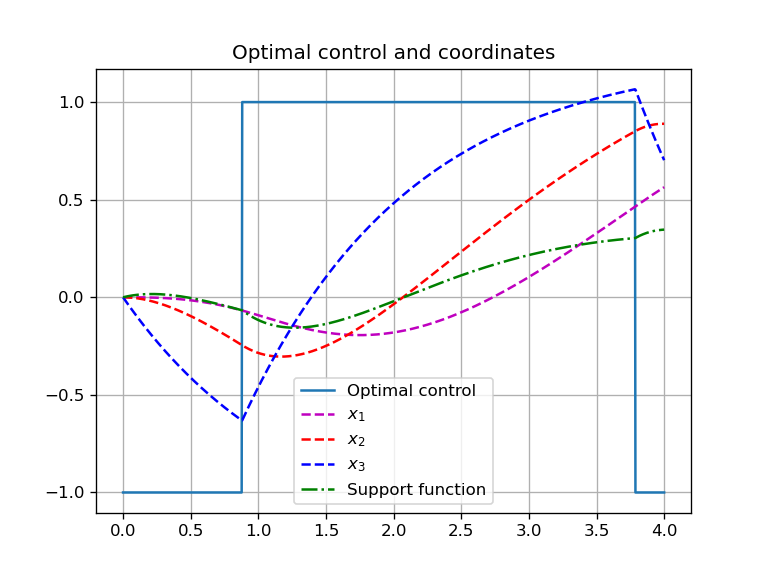

In [7]:
# Plot a trajectory data
u_opt = [u_opt_func(t) for t in t_range]

fig2d, ax2d = plt.subplots()
ax2d.set_title('Optimal control and coordinates')
ax2d.grid()

ax2d.plot(t_range, u_opt, label='Optimal control')

ax2d.plot(t_range, X1, '--m', label='$x_1$')
ax2d.plot(t_range, X2, '--r', label='$x_2$')
ax2d.plot(t_range, X3, '--b', label='$x_3$')
ax2d.plot(t_range, p @ sol.y, '-.g', label='Support function')
ax2d.legend();